# Import libaries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN as SklearnDBSCAN

# Create Sample Dataset

In [23]:
X, _ = make_moons(n_samples=200, noise=0.1)

# Implement DBSCAN Algorithm

In [24]:
# Implement DBSCAN algorithm without using existing libraries (like sklearn)
def DBSCAN(data, eps, min_samples):
    labels = [0] * len(data)  # Initialize all points as noise (label = 0)
    cluster_id = 0  # Cluster ID

    # Iterate through each point in the dataset
    for i in range(len(data)):
        # If this point has already been labeled (belonging to a cluster or noise), skip
        if labels[i] != 0:
            continue

        # Find neighbors of the current point
        neighbors = find_neighbors(data, i, eps)

        # If the number of neighbors is less than min_samples, mark as noise
        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            cluster_id += 1  # Increment cluster ID
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels

def find_neighbors(data, point_index, eps):
    neighbors = []
    for i in range(len(data)):
        if np.linalg.norm(data[point_index] - data[i]) < eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, labels, point_index, neighbors, cluster_id, eps, min_samples):
    labels[point_index] = cluster_id  # Assign label to the current point
    i = 0
    while i < len(neighbors):
        neighbor = neighbors[i]
        if labels[neighbor] == -1:  # If neighbor is noise, assign to cluster
            labels[neighbor] = cluster_id
        elif labels[neighbor] == 0:  # If neighbor is not labeled
            labels[neighbor] = cluster_id
            new_neighbors = find_neighbors(data, neighbor, eps)
            if len(new_neighbors) >= min_samples:  # If enough points, add to list for checking
                neighbors += new_neighbors
        i += 1

In [25]:
# Apply custom DBSCAN implementation
custom_dbscan_labels = DBSCAN(X, eps=0.2, min_samples=5)

# Apply Scikit-Learn's DBSCAN

In [26]:
# Use scikit-learn's DBSCAN
sklearn_dbscan = SklearnDBSCAN(eps=0.2, min_samples=5)
sklearn_dbscan_labels = sklearn_dbscan.fit_predict(X)

# Compare Results

In [27]:
# Compare results between custom DBSCAN and scikit-learn's DBSCAN
print(f"Results of custom DBSCAN: \n {custom_dbscan_labels}")
print(f"Results of scikit-learn's DBSCAN: \n {sklearn_dbscan_labels}")


Results of custom DBSCAN: 
 [1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2]
Results of scikit-learn's DBSCAN: 
 [0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 

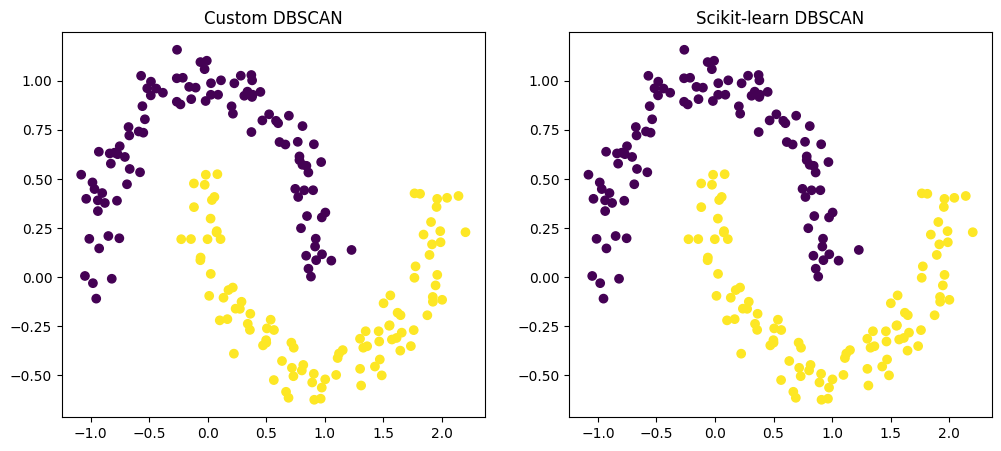

In [28]:
# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=custom_dbscan_labels, cmap='viridis')
plt.title('Custom DBSCAN')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_dbscan_labels, cmap='viridis')
plt.title('Scikit-learn DBSCAN')

plt.show()